In [1]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files (x86)\\graphviz-2.38\\bin" + os.pathsep + "C:\\Program Files (x86)\\graphviz-2.38"

In [2]:
from IPython.display import SVG, display, HTML
from graphviz import Source

style = "<style>svg{width:50% !important; height:50% !important;}</style>"
HTML(style)

In [2]:
titanic_data = pd.read_csv('Data/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Задача. Обучить модель выжил ли пассажир или нет.

In [4]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X = pd.get_dummies(X)
X = X.fillna({'Age': X.Age.median()})
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [6]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [7]:
Y = titanic_data.Survived

In [19]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [20]:
clf.fit(X, Y)


DecisionTreeClassifier(criterion='entropy')

In [21]:
clf.score(X, Y)

0.9797979797979798

In [53]:
X_train = X.iloc[:700]
Y_train = Y.iloc[:700]
X_test = X.iloc[701:]
Y_test = Y.iloc[701:]

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3) #  создаю параметры дерева для обучения модели

In [55]:
clf.fit(X_train, Y_train) # Обучаю модель
print(clf.score(X_train, Y_train))
print(clf.score(X_test, Y_test))

0.8142857142857143
0.8421052631578947


In [13]:
# graph = Source(tree.export_graphviz(clf, out_file=None,
#                                     feature_names=list(X),
#                                     class_names=['Died', 'Survived'],
#                                     filled=True))
# display(SVG(graph.pipe(format='svg')))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [4]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, fontsize=10, feature_names=list(X), filled=True)
plt.show()

NameError: name 'clf' is not defined

<Figure size 7200x1800 with 0 Axes>

In [59]:
from sklearn import datasets

In [64]:
iris_df = pd.DataFrame(datasets.load_iris(return_X_y=True))
iris_df

C:\Users\kabec\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


ValueError: could not broadcast input array from shape (150,4) into shape (150,)

In [95]:
train_iris_df = pd.read_csv('Data/train_iris.csv', index_col=0)
test_iris_df = pd.read_csv('Data/test_iris.csv', index_col=0)
x_train = train_iris_df.iloc[:,:-1]
y_train = train_iris_df.iloc[:,-1]
x_test = test_iris_df.iloc[:,:-1]
y_test = test_iris_df.iloc[:,-1]

In [82]:
test_iris_df

,sepal length,sepal width,petal length,petal width,species
114,5.8,2.8,5.1,2.4,2
70,5.9,3.2,4.8,1.8,1
138,6.0,3.0,4.8,1.8,2
59,5.2,2.7,3.9,1.4,1
44,5.1,3.8,1.9,0.4,0
125,7.2,3.2,6.0,1.8,2
36,5.5,3.5,1.3,0.2,0
141,6.9,3.1,5.1,2.3,2
12,4.8,3.0,1.4,0.1,0
63,6.1,2.9,4.7,1.4,1


In [112]:
scores = pd.DataFrame()
np.random.seed(0)
for max_depth in range(1,101):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(train_iris_df.iloc[:,:-1], train_iris_df.iloc[:,-1])
    train_score = clf.score(train_iris_df.iloc[:,:-1], train_iris_df.iloc[:,-1])
    test_score = clf.score(test_iris_df.iloc[:,:-1], test_iris_df.iloc[:,-1])
    temp_score = pd.DataFrame({'max_depth':[max_depth],
                               'train_score':[train_score],
                               'test_score':[test_score]})
    # scores = scores.append(temp_score)
    scores = pd.concat([scores, temp_score])

<AxesSubplot:xlabel='max_depth'>

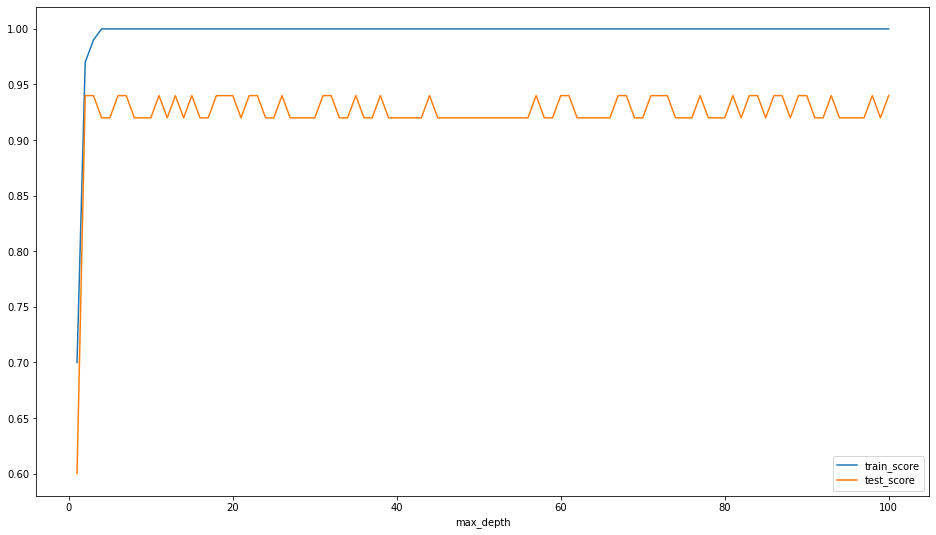

In [113]:
scores.set_index('max_depth').plot(figsize=(16,9))


In [145]:
train_dogs_cats_df = pd.read_csv('Data/dogs_n_cats.csv')
train_dogs_cats_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка


In [125]:
train_dogs_cats_df = pd.get_dummies(train_dogs_cats_df)
train_dogs_cats_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид_котик,Вид_собачка
0,15,18.0,1,1,0,0,1
1,20,24.0,1,0,0,0,1
2,34,40.8,1,1,0,0,1
3,26,31.2,1,1,0,0,1
4,16,19.2,1,1,0,0,1


In [133]:
train_dogs_cats_df = train_dogs_cats_df.rename(columns={'Вид_котик': 'Вид'}).drop('Вид_собачка', axis=1)

In [146]:
scores = pd.DataFrame()
for max_depth in range(1,5):
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(train_dogs_cats_df.iloc[:,:-1], train_dogs_cats_df.iloc[:,-1])
    train_score = clf.score(train_dogs_cats_df.iloc[:,:-1], train_dogs_cats_df.iloc[:,-1])
    temp_score = pd.DataFrame({'max_depth':[max_depth],
                               'train_score':[train_score]})
    scores = pd.concat([scores, temp_score])

In [147]:
scores.head()


,max_depth,train_score
0,1,1.0
0,2,1.0
0,3,1.0
0,4,1.0


In [148]:
train_dogs_cats_df.iloc[:,:]

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


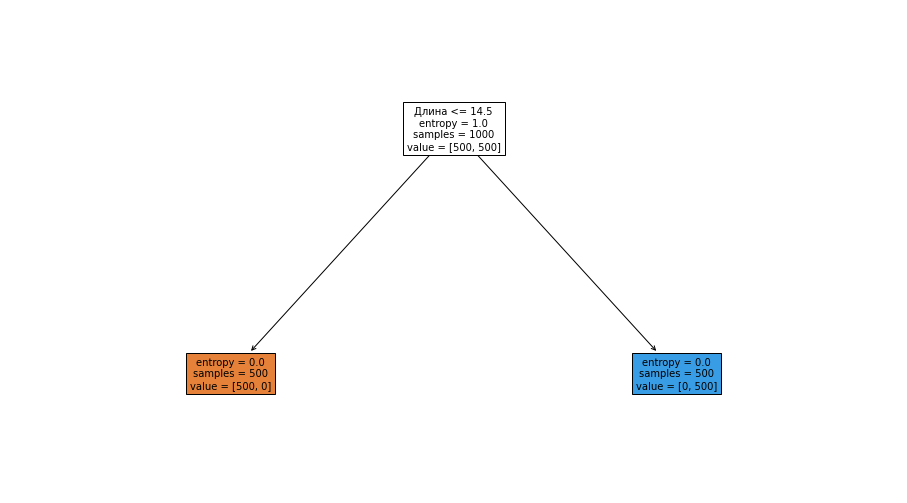

In [149]:
plt.figure(figsize=(16, 9))
tree.plot_tree(clf, fontsize=10, feature_names=list(train_dogs_cats_df.iloc[:,:-1]), filled=True)
plt.show()

In [143]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(train_dogs_cats_df.iloc[:,:-1], train_dogs_cats_df.iloc[:,-1])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [153]:
list(clf.predict(train_dogs_cats_df.iloc[:,:-1])).count('собачка')

500

In [157]:
train_dogs_cats_df = pd.read_json('Data/dataset_209691_15.txt')
train_dogs_cats_df.head()

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,34,40.8,1,1,0
1,34,40.8,1,0,0
2,29,34.8,1,1,0
3,17,20.4,1,1,0
4,15,18.0,1,1,0


In [158]:
list(clf.predict(train_dogs_cats_df)).count('собачка')

50